# Logistic Regression in Healthcare

## Package Imports

In [1]:
import pandas as pd  
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
from sklearn_pandas import DataFrameMapper
from sklearn import metrics, datasets, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix

## Path to the dataset

Link to the dataset : https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Prognostic)

In [3]:
dataset_path = "./data/wpbc.data"

### Attributes present in the dataset

In [4]:
column_names = ['ID','Outcome','Time', 'Radius Mean', 'Texture Mean', 'Perimeter Mean',
       'Area Mean', 'Smoothness Mean', 'Compactness Mean', 'Concavity Mean',
       'Concave Points Mean', 'Symmetry Mean', 'Fractal Dimension Mean',
       'Radius SE', 'Texture SE', 'Perimeter SE', 'Area SE', 'Smoothness SE',
       'Compactness SE', 'Concavity SE', 'Concave Points SE', 'Symmetry SE',
       'Fractal Dimension SE', 'Radius Worst', 'Texture Worst',
       'Perimeter Worst', 'Area Worst', 'Smoothness Worst',
       'Compactness Worst', 'Concavity Worst', 'Concave Points Worst',
       'Symmetry Worst', 'Fractal Dimension Worst', 'Tumor Size', 'Lymph Node Status']

Reading the data into a **Pandas Dataframe**

In [5]:
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", sep=",")

dataset = raw_dataset.copy()

This is how the data looks like after loading it onto a Pandas Dataframe

In [6]:
dataset.head()

,ID,Outcome,Time,Radius Mean,Texture Mean,Perimeter Mean,Area Mean,Smoothness Mean,Compactness Mean,Concavity Mean,...,Perimeter Worst,Area Worst,Smoothness Worst,Compactness Worst,Concavity Worst,Concave Points Worst,Symmetry Worst,Fractal Dimension Worst,Tumor Size,Lymph Node Status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.0
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.0
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0.0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0


Number of rows of data present in the dataset are 198.

In [7]:
dataset.shape

(198, 35)

Checking the presence of NA values and dropping them along with the ID attribute

In [8]:
dataset.isna().sum()

ID                         0
Outcome                    0
Time                       0
Radius Mean                0
Texture Mean               0
Perimeter Mean             0
Area Mean                  0
Smoothness Mean            0
Compactness Mean           0
Concavity Mean             0
Concave Points Mean        0
Symmetry Mean              0
Fractal Dimension Mean     0
Radius SE                  0
Texture SE                 0
Perimeter SE               0
Area SE                    0
Smoothness SE              0
Compactness SE             0
Concavity SE               0
Concave Points SE          0
Symmetry SE                0
Fractal Dimension SE       0
Radius Worst               0
Texture Worst              0
Perimeter Worst            0
Area Worst                 0
Smoothness Worst           0
Compactness Worst          0
Concavity Worst            0
Concave Points Worst       0
Symmetry Worst             0
Fractal Dimension Worst    0
Tumor Size                 0
Lymph Node Sta

In [9]:
dataset = dataset.dropna()
y = dataset['Outcome']
drop_list = ['ID', 'Time', 'Outcome']
dataset = dataset.drop(drop_list, 1)

In [10]:
dataset.shape

(194, 32)

Viewing statistics related to the data attributes

In [11]:
dataset.describe()

,Radius Mean,Texture Mean,Perimeter Mean,Area Mean,Smoothness Mean,Compactness Mean,Concavity Mean,Concave Points Mean,Symmetry Mean,Fractal Dimension Mean,...,Perimeter Worst,Area Worst,Smoothness Worst,Compactness Worst,Concavity Worst,Concave Points Worst,Symmetry Worst,Fractal Dimension Worst,Tumor Size,Lymph Node Status
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,17.402320,22.300979,114.781495,969.092268,0.102774,0.142642,0.156309,0.086808,0.192885,0.062743,...,140.136907,1401.756701,0.143921,0.364567,0.436010,0.178449,0.322251,0.090777,2.867526,3.211340
std,3.171672,4.335292,21.430694,353.159959,0.012607,0.050229,0.070942,0.033962,0.027679,0.007289,...,28.826843,587.040705,0.022092,0.165528,0.174757,0.045529,0.074068,0.021371,1.950588,5.479276
min,10.950000,10.380000,71.900000,361.600000,0.074970,0.046050,0.023980,0.020310,0.130800,0.050250,...,85.100000,508.100000,0.081910,0.051310,0.023980,0.028990,0.156500,0.055040,0.400000,0.000000
25%,15.052500,19.342500,98.160000,702.525000,0.093900,0.109850,0.106075,0.063760,0.174075,0.056718,...,117.925000,940.575000,0.129325,0.247550,0.322150,0.152225,0.275950,0.076368,1.500000,0.000000
50%,17.290000,21.795000,113.700000,929.100000,0.102200,0.131750,0.152050,0.086075,0.189350,0.061715,...,136.500000,1295.000000,0.141750,0.350450,0.401150,0.178500,0.310300,0.086540,2.500000,1.000000
75%,19.580000,24.782500,129.650000,1193.500000,0.111375,0.172200,0.200500,0.103925,0.209550,0.066810,...,159.875000,1694.250000,0.154450,0.423675,0.550175,0.207125,0.358475,0.101775,3.500000,4.000000
max,27.220000,39.280000,182.100000,2250.000000,0.144700,0.311400,0.426800,0.201200,0.304000,0.097440,...,232.200000,3903.000000,0.222600,1.058000,1.170000,0.290300,0.663800,0.207500,10.000000,27.000000


Number of Recurring Cases:  46
Number of Non-Recurring Cases:  148


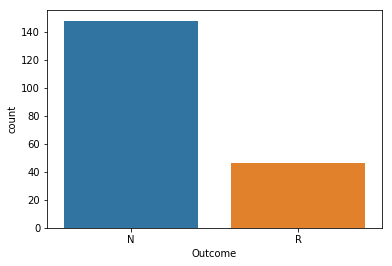

In [12]:
ax = sns.countplot(y,label="Count")
N, R = y.value_counts()
print('Number of Recurring Cases: ', R)
print('Number of Non-Recurring Cases: ',N)

THere is a class imbalance problem in the dataset which adversely affects a model's accuracy.

This occurs when the number of instances of one class(non-recurring cases) in the dataset outweighs the number of instances from the other class(recurring cases).

### We will be building three models in this tutorial
Model 1: A baseline model. 

Model 2: A model with a single attribute as the predictor.

Model 3: A model with basic feature engineering involved.

In [13]:
baseline_dataset = dataset

In [14]:
single_attribute_dataset = dataset[['Radius Mean']]

For building Model 3 let's do some analysis first.

We drop the predictors that are highly correlated with other predictors to avoid the problems associated with **multicollinearity**.

In [16]:
drop_list = ['Texture Mean', 'Perimeter Mean', 'Area Mean','Compactness Mean', 'Smoothness Mean', 'Concavity Mean', 'Symmetry Mean',
             'Radius SE','Perimeter SE', 'Area SE', 'Texture SE', 'Compactness SE', 'Smoothness SE', 'Concavity SE', 'Concave Points SE', 'Fractal Dimension SE', 'Symmetry SE',
             'Area Worst','Perimeter Worst','Compactness Worst', 'Concavity Worst', 'Fractal Dimension Worst', 'Symmetry Worst',
             'Concave Points Worst','Texture Worst','Lymph Node Status', 'Tumor Size']
feature_engineer_dataset = dataset.drop(drop_list,axis = 1 )
feature_engineer_dataset.head()

,Radius Mean,Concave Points Mean,Fractal Dimension Mean,Radius Worst,Smoothness Worst
0,18.02,0.07055,0.06333,21.63,0.1195
1,17.99,0.14710,0.07871,25.38,0.1622
2,21.37,0.08180,0.06010,24.90,0.1188
3,11.42,0.10520,0.09744,14.91,0.2098
4,20.29,0.10430,0.05883,22.54,0.1374


We will also standardize all the features

In [17]:
mapper = DataFrameMapper([(feature_engineer_dataset.columns, StandardScaler())])
scaled_features = mapper.fit_transform(feature_engineer_dataset.copy(), 4)
scaled_features_df = pd.DataFrame(scaled_features, index=feature_engineer_dataset.index, columns=feature_engineer_dataset.columns)

In [18]:
scaled_features_df.describe()

,Radius Mean,Concave Points Mean,Fractal Dimension Mean,Radius Worst,Smoothness Worst
count,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02
mean,-2.380684e-16,-4.486674e-16,1.831296e-16,-9.339608e-16,-1.300220e-15
std,1.002587e+00,1.002587e+00,1.002587e+00,1.002587e+00,1.002587e+00
min,-2.039623e+00,-1.963047e+00,-1.718372e+00,-1.924796e+00,-2.814177e+00
25%,-7.427941e-01,-6.803797e-01,-8.287653e-01,-8.031174e-01,-6.623828e-01
50%,-3.550499e-02,-2.162911e-02,-1.413577e-01,-1.100378e-01,-9.850966e-02
75%,6.883798e-01,5.053123e-01,5.594610e-01,6.468005e-01,4.778435e-01
max,3.103436e+00,3.376921e+00,4.772626e+00,3.338830e+00,3.570636e+00


### Building the Logistic Regression Models

In [19]:
def build_and_evaluate_model(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    regr = linear_model.LogisticRegression(solver = "lbfgs", max_iter = 2000)
    regr.fit(x_train, y_train)
    y_pred = regr.predict(x_test)
    accuracy = regr.score(x_test, y_test)
    print("The accuracy of the model is " , accuracy * 100)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm,annot=True,fmt="d")

### Model 1 - The baseline model

The accuracy of the model is  84.61538461538461


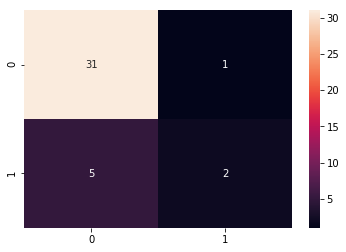

In [20]:
build_and_evaluate_model(baseline_dataset, y)

### Model 2 - A single predictor model

The accuracy of the model is  82.05128205128204


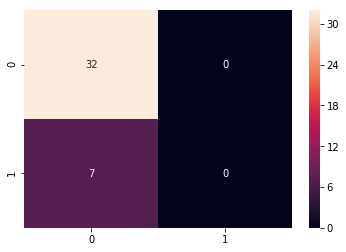

In [21]:
build_and_evaluate_model(single_attribute_dataset, y)

### Model 3 -  A feature engineered model

The accuracy of the model is  89.74358974358975


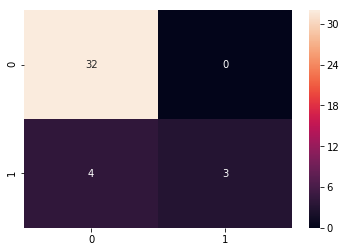

In [22]:
build_and_evaluate_model(scaled_features_df, y)